<a href="https://colab.research.google.com/github/vijayamurugan27/GenerativeAI/blob/main/Agents_%2B_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern AI Pro: Agents in LLMs
1. Low level goals to high level goals
2. One shot to an iterative process
3. Planning to break down tasks
4. Using tools to execute the tasks
5. Get external feedback along the way
6. Keep a memory of everything
7. Access to real time and external data
8. Sync to Async

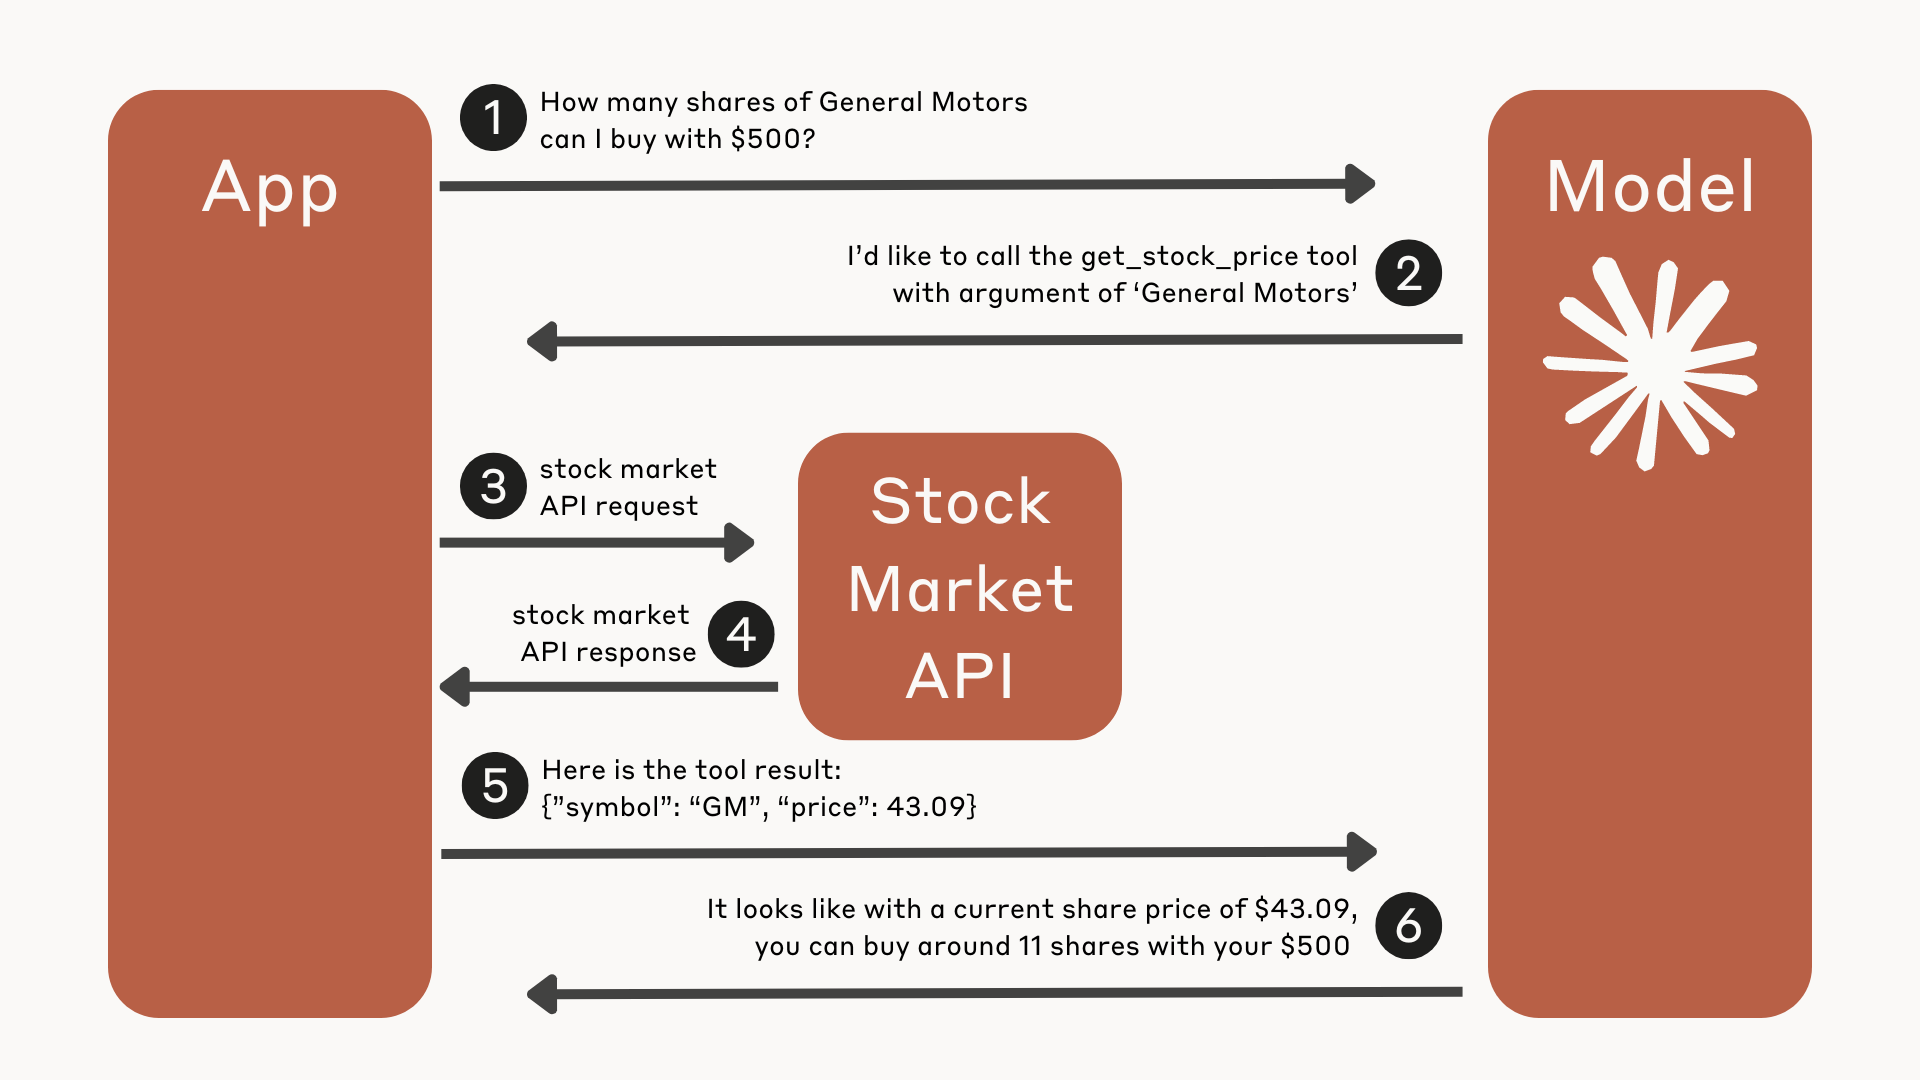

In [1]:
!pip install -U -q crewai crewai-tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.0/463.0 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.9/617.9 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.4/211.4 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import userdata
import os
os.environ["GROQ_API_KEY"] = userdata.get("GROQ_API_KEY")

In [4]:
from crewai import Agent, Task, Crew, Process
from crewai_tools import SerperDevTool
os.environ["SERPER_API_KEY"] = userdata.get("SERPER_API_KEY")

search_tool = SerperDevTool(n_results=5)

search_tool

SerperDevTool(name='Search the internet', description="Tool Name: Search the internet\nTool Arguments: {'search_query': {'description': 'Mandatory search query you want to use to search the internet', 'type': 'str'}}\nTool Description: A tool that can be used to search the internet with a search_query.", args_schema=<class 'crewai_tools.tools.serper_dev_tool.serper_dev_tool.SerperDevToolSchema'>, description_updated=False, cache_function=<function BaseTool.<lambda> at 0x790bc887d360>, result_as_answer=False, search_url='https://google.serper.dev/search', country='', location='', locale='', n_results=5, save_file=False)

In [5]:
# Create the researcher agent
researcher = Agent(
    role='Senior Research Analyst',
    goal='Uncover cutting-edge developments in AI and data science',
    backstory="""You work at a leading tech think tank.
  Your expertise lies in identifying emerging trends.
  You have a knack for dissecting complex data and presenting actionable insights.""",
    verbose=True,
    allow_delegation=False,
    llm='groq/llama-3.2-90b-text-preview',
      tools=[search_tool]
)

In [6]:
# Create the writer agent
writer = Agent(
    role='Tech Content Strategist',
    goal='Craft compelling content on tech advancements',
    backstory="""You are a renowned Content Strategist, known for your insightful and engaging articles.
  You transform complex concepts into compelling narratives.""",
    verbose=True,
    llm='groq/llama-3.2-90b-text-preview',
    allow_delegation=True
)


In [7]:
# Create tasks for the agents
task1 = Task(
    description="""Conduct a comprehensive analysis of RAG vs Fine Tuning in LLMs.""",
    expected_output="Full analysis report in bullet points",
    agent=researcher
)


In [8]:
# Instantiate your crew with a sequential process and add a step limit
crew = Crew(
    agents=[researcher, writer],
    tasks=[task1],
    verbose=True,
    max_rpm=3,
    max_steps=3  # Add a max_steps parameter to avoid infinite loops
)

In [9]:
# Get your crew to work!
result = crew.kickoff()

print("######################")
print(result)

# Agent: Senior Research Analyst
## Task: Conduct a comprehensive analysis of RAG vs Fine Tuning in LLMs.


# Agent: Senior Research Analyst
## Thought: Thought: To conduct a comprehensive analysis of RAG vs Fine Tuning in LLMs, I need to start by understanding the concepts of RAG and Fine Tuning.
## Using tool: Search the internet
## Tool Input: 
"{\"search_query\": \"RAG vs Fine Tuning in LLMs\"}"
## Tool Output: 

Search results: Title: RAG Vs Fine Tuning: How To Choose The Right Method
Link: https://www.montecarlodata.com/blog-rag-vs-fine-tuning/
Snippet: RAG involves augmenting an LLM with access to a dynamic, curated database to improve outputs, while fine-tuning involves training an LLM on a ...
---
Title: When to Apply RAG vs Fine-Tuning - Medium
Link: https://medium.com/@bijit211987/when-to-apply-rag-vs-fine-tuning-90a34e7d6d25
Snippet: Unless the fine-tuned task is very similar to pre-training or requires memorization, RAG suits LLMs better.
---
Title: RAG vs Fine Tuning: Whi

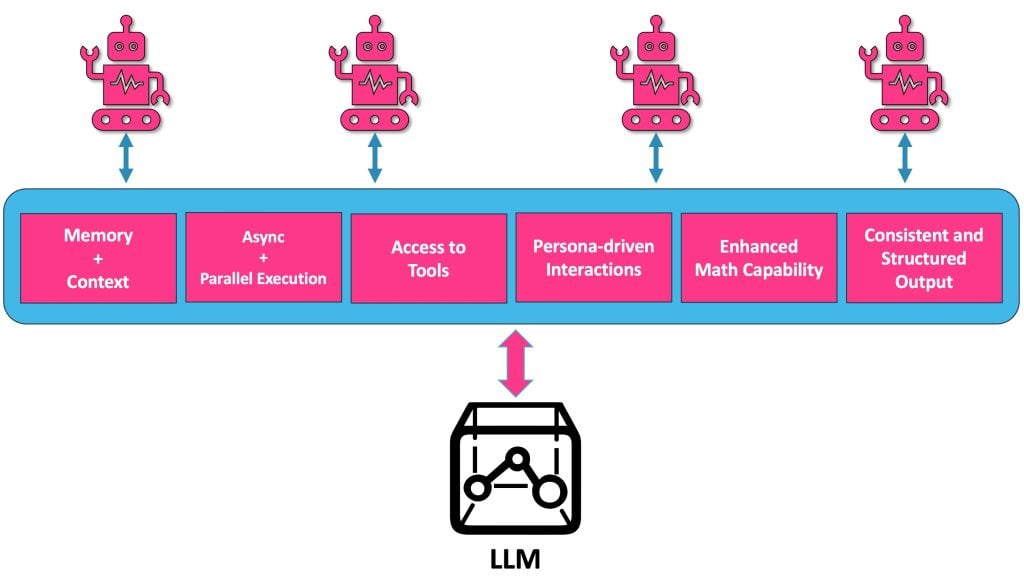

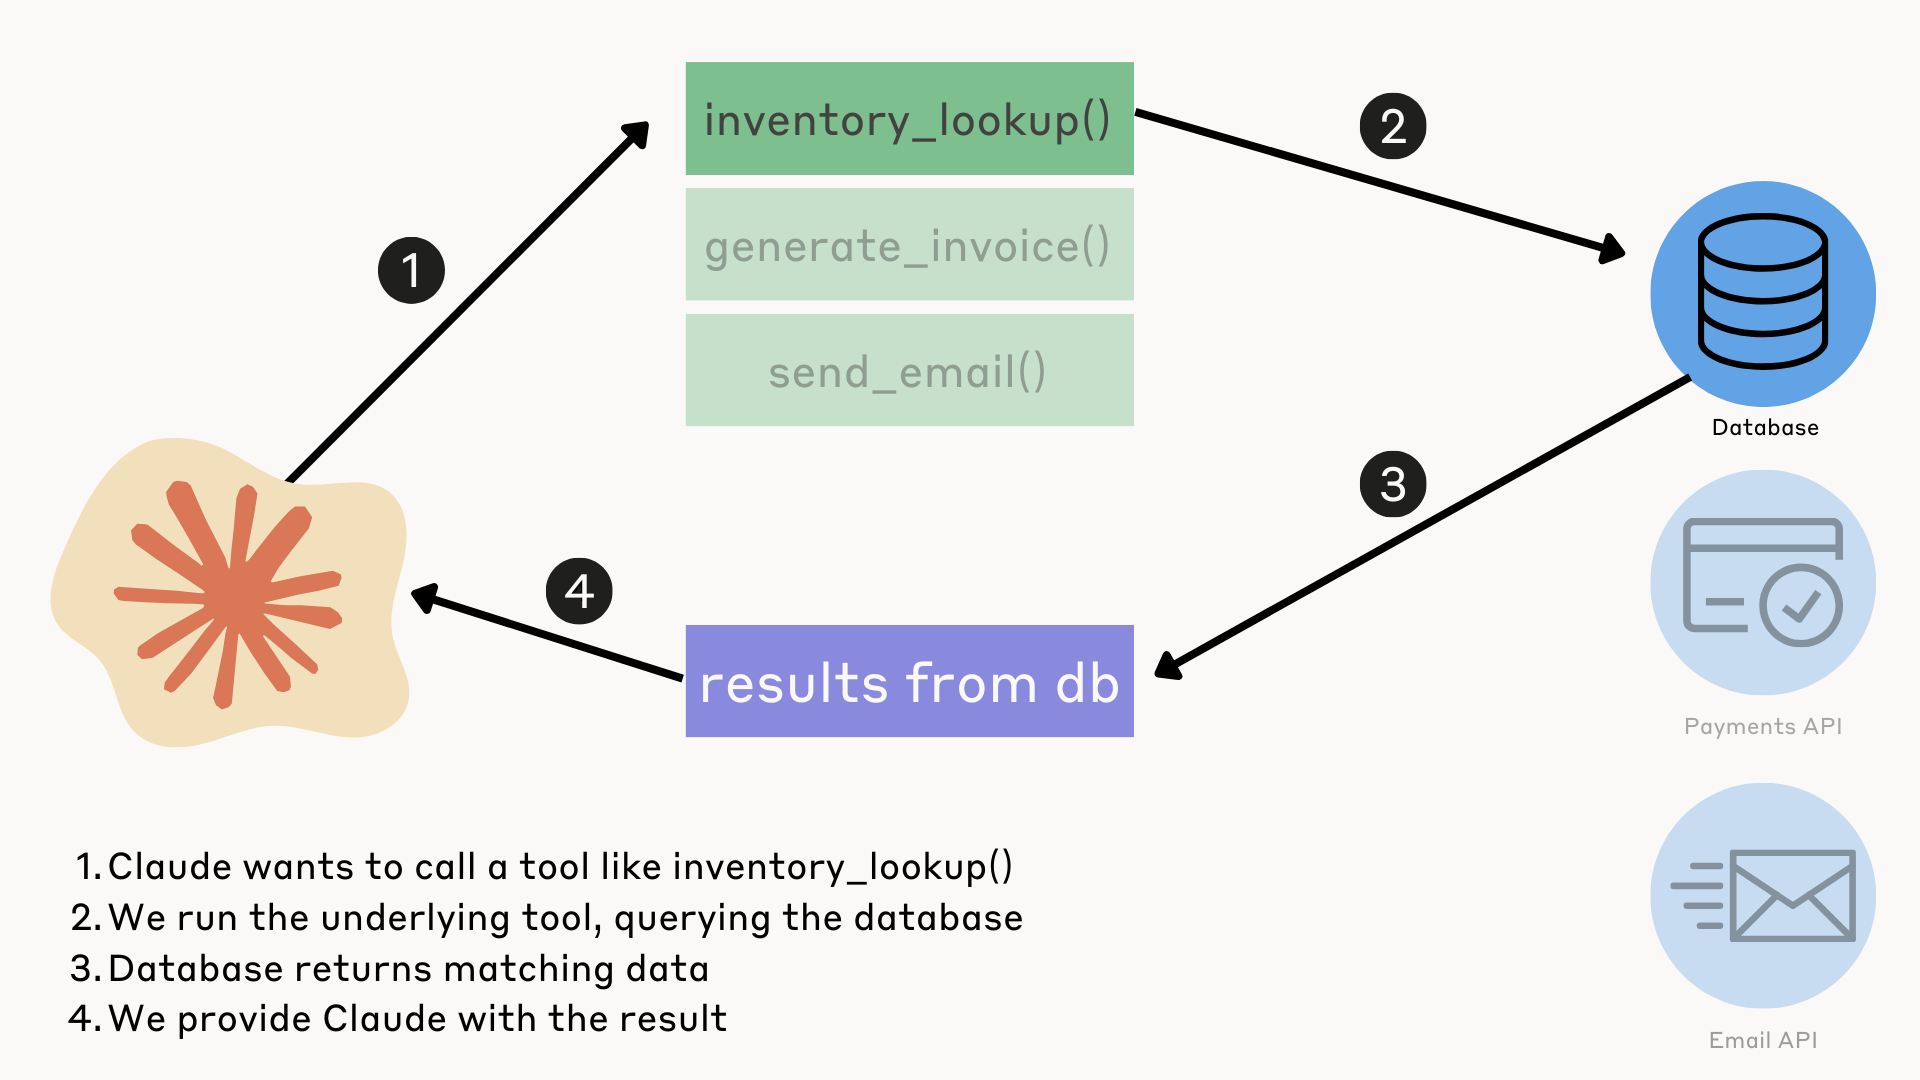